<br>
<hr>

<div style="text-align: justify;">
<br>
<center><div><b style="font-size:21px;">Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria</b></div></center>
<center><div><b style="font-size:22px;color:#72849d">Redes Bayesianas Gaussianas aplicada à predição de vendas em uma grande rede de fast-food brasileira</b></div></center>
<br>
<div style="text-align: justify;">
Resultados apresentados ao Instituto de Ciências Matemáticas e de Computação - ICMC-USP, como parte dos requisitos para obtenção do título de mestre - Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria, sob orientação do <a href="http://conteudo.icmc.usp.br/pessoas/alneu/" target="_blank"> Prof. Dr. Alneu de Andrade Lopes</a> e Co-Orientação <a href="https://scholar.google.com/citations?user=tuOaq-4AAAAJ&hl=pt-BR" target="_blank">Dr. Brett Drury.</a>
</div>
<br>
<hr>
<center><div><b style="font-size:22px;">Previsão de Vendas - Grupo de Bebidas - SP</b></div></center>
<hr>

In [1]:
import statsmodels.api as sm
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True

# pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
# matplotlib.rcParams.update(pgf_with_rc_fonts)

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pyflux as pf
from pyramid.arima import auto_arima
from scipy import stats

plt.style.use('seaborn-whitegrid')

/Users/robsonfernandes/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
matplotlib.rcParams['pgf.texsystem']

'xelatex'

In [3]:
# plt.rc('font', family='serif', serif='cm10')
# plt.rc('text', usetex=True)

In [4]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


In [5]:
data = pd.read_excel('data/food-sp.xlsx')

In [6]:
data.columns.values

array(['UF', 'DATA', 'VENDA', 'ADICIONAL', 'BRINDE', 'MOLHO FESTIVAL',
       'CHOPP COM UNIDADE EM LITRO', 'BEBIDA COM UNIDADE EM LITRO',
       'BEX SALADAS', 'DOCE E TORTA', 'BEBIDA', 'MOLHO',
       'GELADO E MILK SHAKE', 'ITENS DE COMPOSIÇÃO', 'BEX SNACKS',
       'BEX DOCES', 'BEX SANDUICHES E MOLHOS', 'SACHET MOLHO PINCANHA',
       'BEX GELADOS E MILKSHAKES', 'BEX CAFE', 'PROJETO CAFÉ',
       'PROJETO CHOPP', 'PRATO', 'BEX BEBIDAS', 'LANCHE FRANQUEADO',
       'ACOMPANHAMENTO', 'SANDUICHE', 'LINHA ORIGINAL', 'OUTROS',
       'CALDA BOBS TOP', 'REFEICAO COLABORADORES'], dtype=object)

In [7]:
variavel = 'BEBIDA'

In [8]:
data.index = data['DATA']

In [9]:
df_train = data.iloc[1:84,]
df_test = data.iloc[84:96,] 

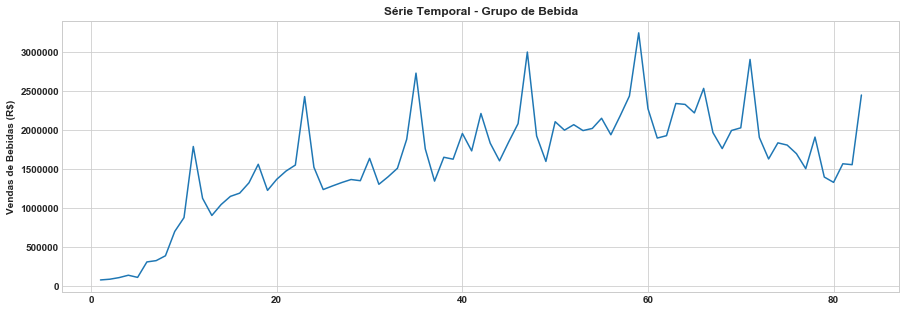

In [35]:
plt.figure(figsize=(15,5))
plt.plot(list(range(1,84)), df_train[variavel])
plt.ylabel('Vendas de Bebidas (R$)', fontweight='bold')
plt.title('Série Temporal - Grupo de '+ variavel.title(),fontweight='bold')
# plt.rc('grid', linestyle="--")
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')

plt.savefig('figure.pdf')
plt.show()

In [12]:
df_train[variavel+'_box'], lmbda = stats.boxcox(df_train[variavel])

In [13]:
model = auto_arima(df_train[variavel+'_box'], 
                    n_fits=12,
                    start_p=0, 
                    start_q=0, 
                    max_p=5, 
                    max_q=5, 
                    m=20,
                    start_P=0, 
                    d=1, 
                    D=1, 
                    trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=True)  # set to stepwise

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 20); AIC=2096.978, BIC=2106.653, Fit time=0.626 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=2113.243, BIC=2120.499, Fit time=0.092 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2092.117, BIC=2104.211, Fit time=0.539 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2095.494, BIC=2105.169, Fit time=0.450 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2092.216, BIC=2106.729, Fit

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 20)   Log Likelihood               -1037.596
Date:                            Sat, 24 Mar 2018   AIC                           2087.192
Time:                                    19:52:27   BIC                           2101.705
Sample:                                         0   HQIC                          2093.022
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.534e+05   1.03e+06     -0.344      0.731   -2.37e+06    1.66e+06
ma.L1         -0.7236      0.392     -1.846      0.065      -1.492       0.045
ar.S.L20      -0.7815      1.845     -0.424      0.672      -4.398       2.835
ar.S.L40      -0.4198      1.118     -0.375      0.707      -2.611       1.772
ma.S.L20      -0.1192      2.134     -0.056      0.955      -4.302       4.063
sigma2      3.295e+13      0.010   3.44e+15      0.000     3.3e+13     3.3e+13
===================================================================================
Ljung-Box (Q):                      169.77   Jarque-Bera (JB):                24.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.26
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+31. Standard errors may be unstable.
"""

In [15]:
forecast = model.predict(n_periods=12)
forecast

array([11830333.01769496, 10973727.1202063 , 11960099.47310128,
       14572959.63935975, 10236732.62365581,  8990334.54861628,
       11688508.00988168, 10809152.47022806,  9758515.20890362,
        9185546.96906219, 10733691.17014962, 14633437.72095203])

In [16]:
len(df_test[variavel].values)

12

In [17]:
len(forecast)

12

In [18]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [19]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
y_pred = invboxcox(forecast,lmbda)
y_true = df_test[variavel].values

<h1>Acurácia</h1>

In [21]:
acuracia = round(100 - mean_absolute_percentage_error(y_true , y_pred),0)
acuracia

86.0

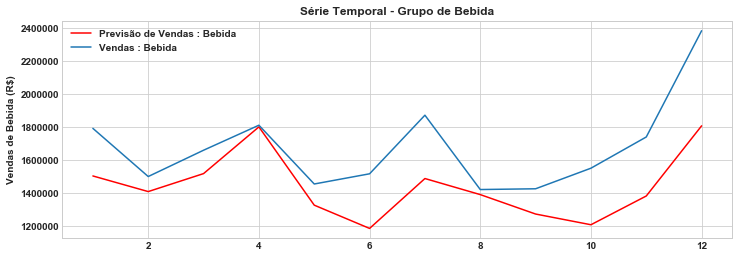

In [71]:
legend_properties = {'weight':'bold'}

plt.figure(figsize=(12,4))
plt.plot(list(range(1,13)), y_pred, '-', label='Previsão de Vendas : '+ variavel.title() ,color='r')
plt.plot(list(range(1,13)), y_true, label='Vendas : '+ variavel.title())
plt.legend(prop=legend_properties)
plt.ylabel('Vendas de '+ variavel.title() + ' (R$)',fontweight='bold')
plt.title('Série Temporal - Grupo de '+ variavel.title(),fontweight='bold')
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.savefig('forecasting-'+variavel.title().lower()+'.pdf')
plt.show()